<a href="https://colab.research.google.com/github/NMThanh123/Term-Project-of-course-AI/blob/main/train_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import pickle
from keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [ ]:
# initial parameters
epochs = 20
lr = 1e-3
batch_size = 32
img_dims = (224, 224, 3)

# Load data, transfer to array and pre-processing
file = open('/content/drive/MyDrive/Cuoi_ky_AI/Code/data_gender.data', 'rb')
images, labels = pickle.load(file)

print(images.shape, labels.shape)

(1618, 224, 224, 3) (1618,)


In [ ]:
# # split dataset for training and validation
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=1)
t = testX
trainX = trainX/255.0
testX = testX/255.0

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

aug = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.5, zoom_range=0.5,
                         horizontal_flip=True, fill_mode="nearest")


In [ ]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    # if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
    #     inputShape = (depth, height, width)
    #     chanDim = 1
    # print(chanDim)
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], classes=2)
model.summary()



-1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_18 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 batch_normalization_16 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 74, 74, 64)    

In [ ]:
# compile the model
opt = Adam(learning_rate=lr)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),validation_data=(testX,testY), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)


<ipython-input-9-a1fc857d60a8>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),validation_data=(testX,testY), steps_per_epoch=len(trainX)//batch_size, epochs=epochs, verbose=1)


Epoch 1/20
40/40 [==============================] - 18s 423ms/step - loss: 0.7631 - accuracy: 0.6830 - val_loss: 1.6921 - val_accuracy: 0.4877
Epoch 2/20
40/40 [==============================] - 18s 437ms/step - loss: 0.5041 - accuracy: 0.7607 - val_loss: 0.6958 - val_accuracy: 0.6049
Epoch 3/20
40/40 [==============================] - 16s 387ms/step - loss: 0.4333 - accuracy: 0.8043 - val_loss: 1.0872 - val_accuracy: 0.4877
Epoch 4/20
40/40 [==============================] - 16s 404ms/step - loss: 0.4589 - accuracy: 0.7892 - val_loss: 1.3933 - val_accuracy: 0.4877
Epoch 5/20
40/40 [==============================] - 16s 391ms/step - loss: 0.4133 - accuracy: 0.8122 - val_loss: 0.6608 - val_accuracy: 0.6235
Epoch 6/20
40/40 [==============================] - 16s 392ms/step - loss: 0.3851 - accuracy: 0.8352 - val_loss: 0.9635 - val_accuracy: 0.5216
Epoch 7/20
40/40 [==============================] - 17s 418ms/step - loss: 0.3549 - accuracy: 0.8431 - val_loss: 0.5832 - val_accuracy: 0.6698

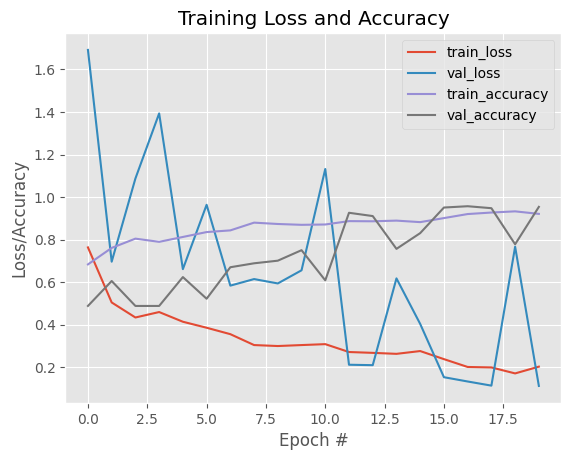

In [ ]:

# save the model to disk
model.save('/content/drive/MyDrive/Cuoi_ky_AI/model_train/gender_detection_final.h5')

# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')



In [ ]:
model = load_model('/content/drive/MyDrive/Cuoi_ky_AI/model_train/gender_detection_final.h5')

1/1 [==============================] - 0s 20ms/step
male


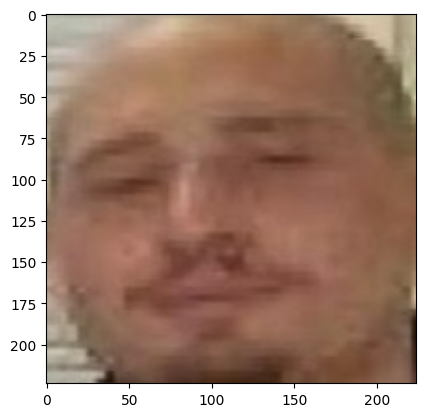

In [ ]:
plt.style.use('default')
gender = ['female', 'male']
test1 = testX[48]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(gender[np.argmax(result)])
test = np.array(t[48], dtype=np.uint8)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 22ms/step
mmale


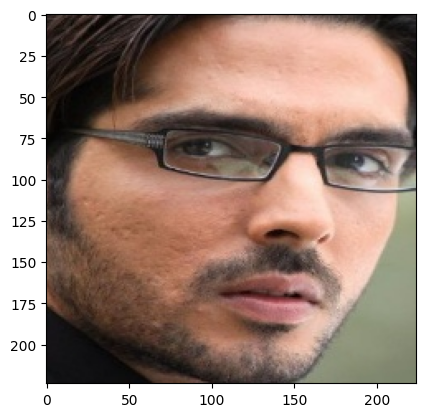

In [ ]:
plt.style.use('default')
gender = ['female', 'male']
test1 = testX[9]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(gender[np.argmax(result)])
test = np.array(t[9], dtype=np.uint8)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 57ms/step
female


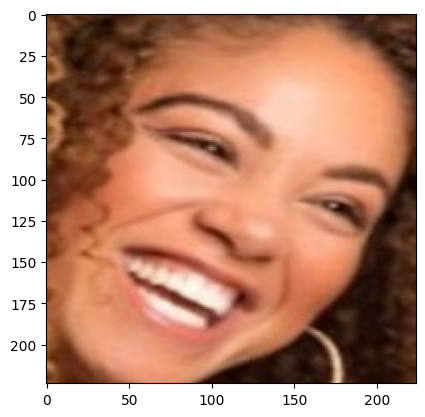

In [ ]:
plt.style.use('default')
gender = ['female', 'male']
test1 = testX[85]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(gender[np.argmax(result)])
test = np.array(t[85], dtype=np.uint8)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

1/1 [==============================] - 0s 27ms/step
female


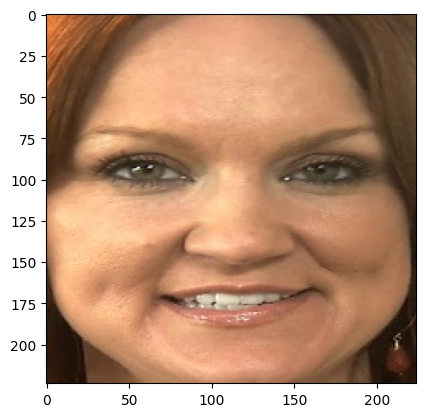

In [ ]:
plt.style.use('default')
gender = ['female', 'male']
test1 = testX[50]
test1 = np.expand_dims(test1, axis=0)
result = model.predict(test1)[0]
print(gender[np.argmax(result)])
test = np.array(t[50], dtype=np.uint8)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()